In [27]:
#loading the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Loading the dataset
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [29]:
data.shape

(908, 13)

In [30]:
#Loading the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [31]:
#Obtaining the statistics
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [32]:
# Checking whether the data is having any null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


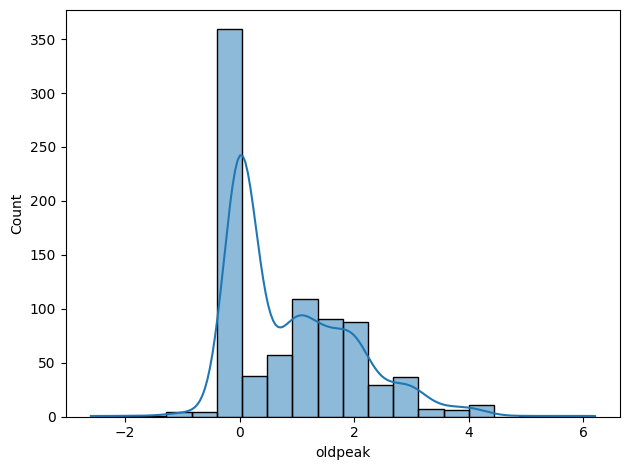

In [33]:
# Checking the data distribution of oldpeak feature
sns.histplot(data['oldpeak'],bins = 20,kde = True)
plt.tight_layout()
plt.show()

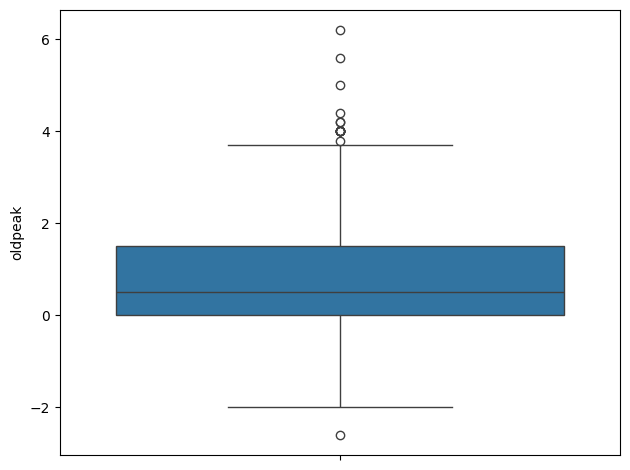

In [34]:
# Checking whether the oldpeak is having any outliers
sns.boxplot(data['oldpeak'])
plt.tight_layout()
plt.show()

In [35]:
# Applying median imputation method on the oldpeak as it has ouliers and is right skewed.
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())


In [36]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


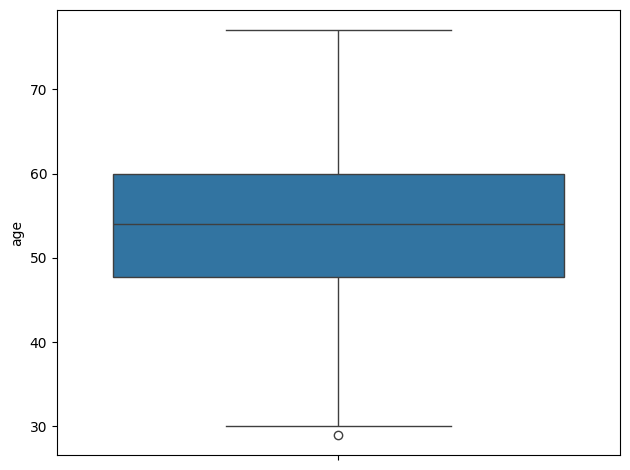

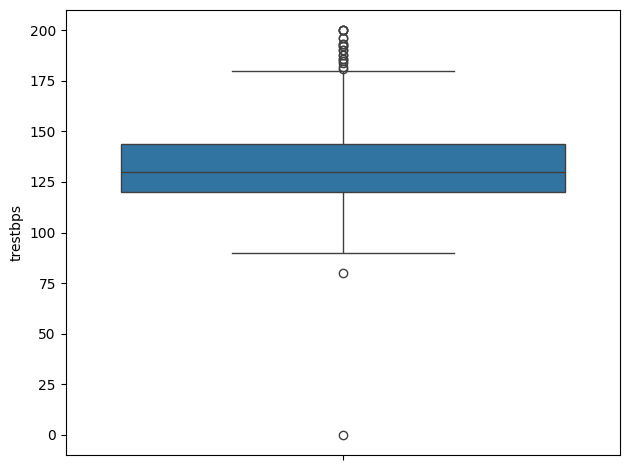

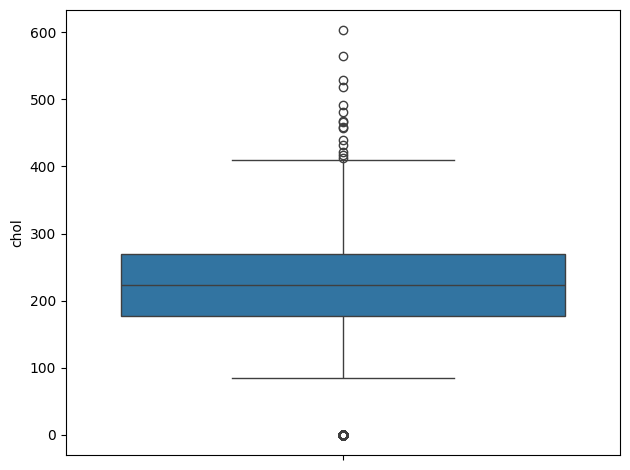

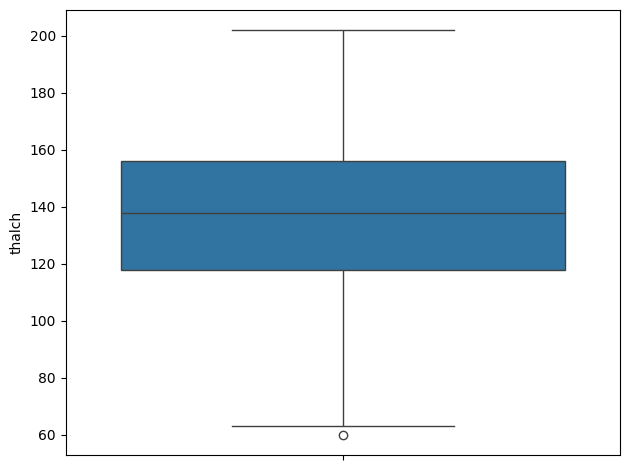

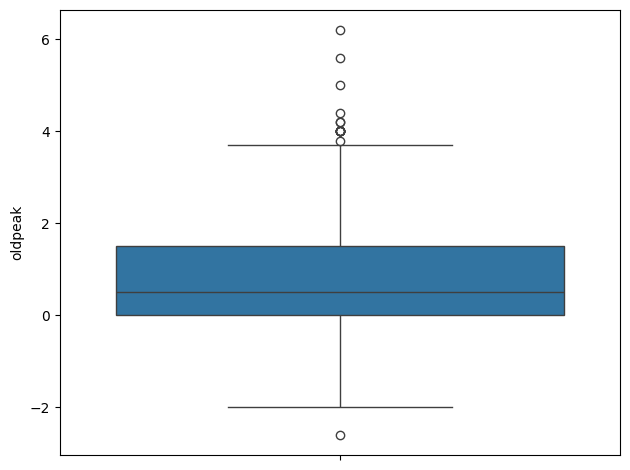

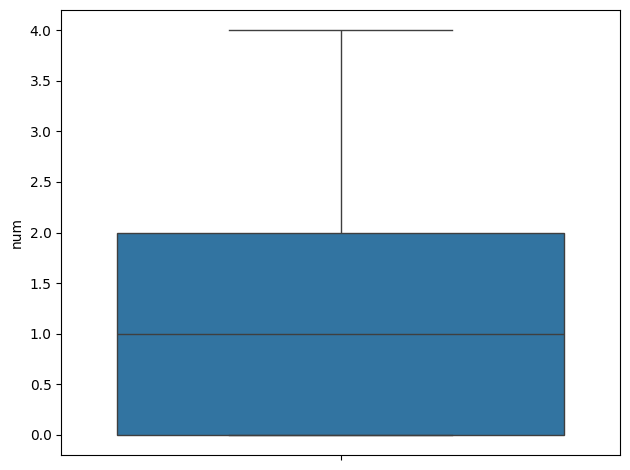

In [37]:
feature_cols = data.select_dtypes(include = ['int64','float64']).columns
feature_cols
for col in feature_cols:
  sns.boxplot(data[col])
  plt.tight_layout()
  plt.show()

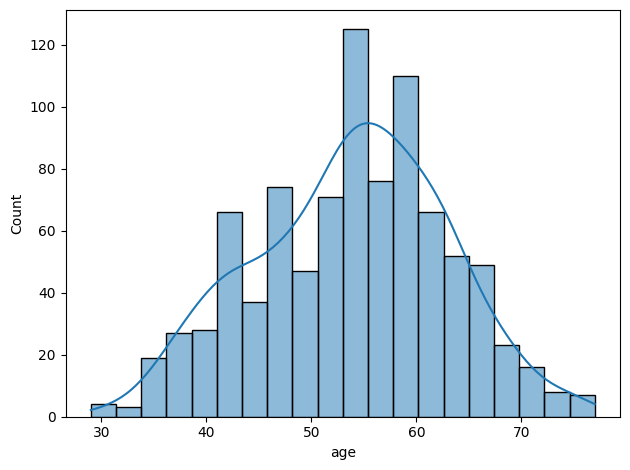

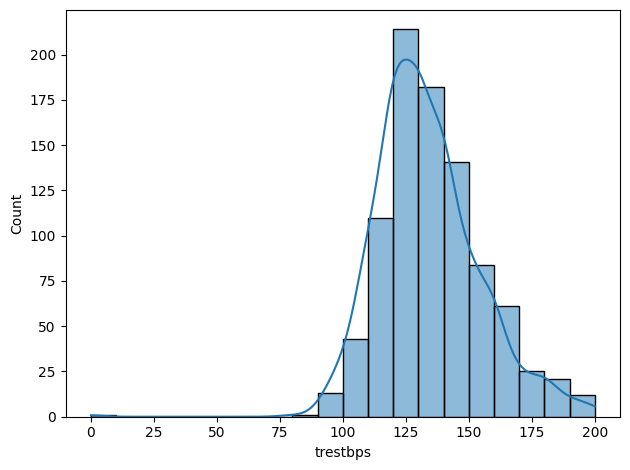

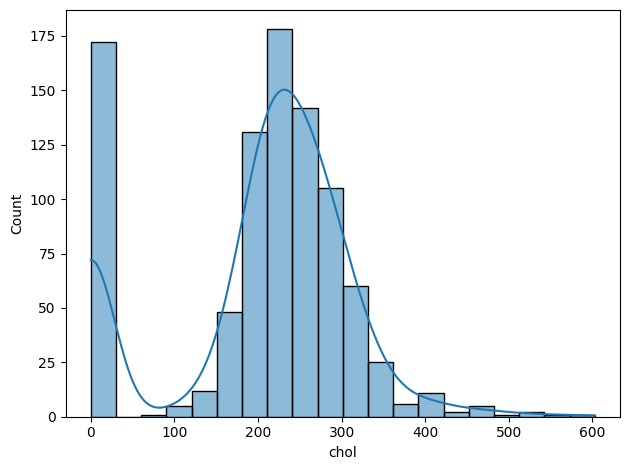

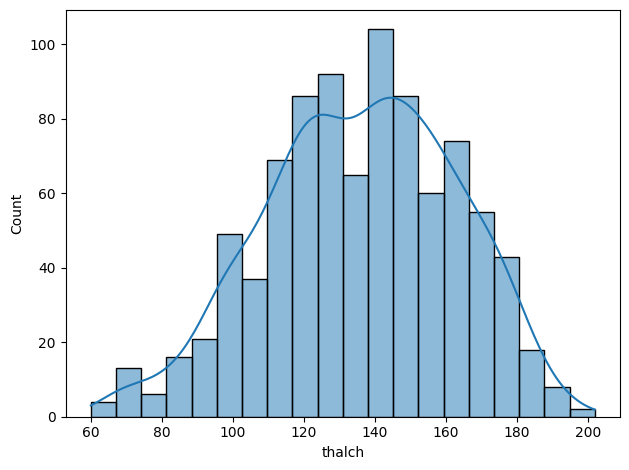

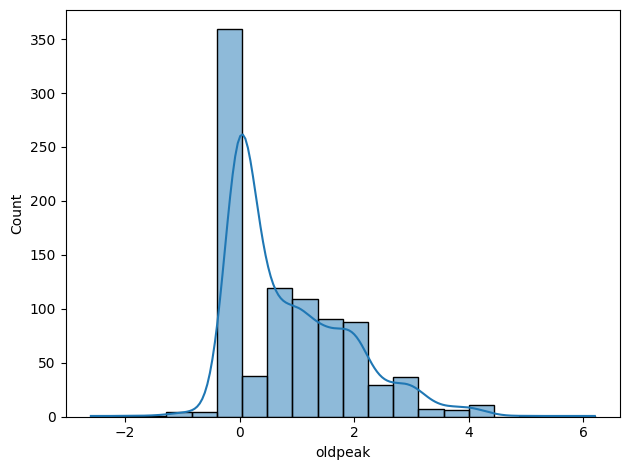

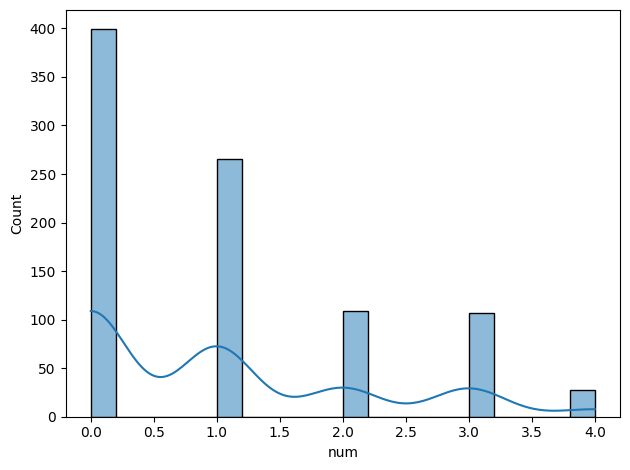

In [38]:
for col in feature_cols:
  sns.histplot(data[col],bins = 20,kde = True)
  plt.tight_layout()
  plt.show()

In [39]:
# Encoding the categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include = ['object','bool']).columns
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [40]:
data = pd.get_dummies(data,drop_first = True)
data.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,True,False,False,False


In [41]:
# Splitting the data using train_test_split
from sklearn.model_selection import train_test_split

features = data.drop('num',axis = 1)
x = features
y = data['num']
y_binary = y.apply(lambda x: 1 if x > 0 else 0)
x_train,x_test,y_train,y_test = train_test_split(x,y_binary,test_size = 0.2,random_state = 42)

In [42]:
# Building the model
# Importing decision tree classifier as target variable is categorical,if target variable is continuous and numerical then regressor has be used
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train,y_train)
# obtaining y_pred from the x_test
y_pred = dt_model.predict(x_test)
from sklearn.metrics import accuracy_score
score_dt  =round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by Decison tree model is:',score_dt)

The Accuracy achieved by Decison tree model is: 75.27


In [43]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
score_lr = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by Logistic regression model is:',score_lr)

The Accuracy achieved by Logistic regression model is: 83.52


In [44]:
from sklearn.svm import SVC
sv_model = SVC(random_state = 42)
sv_model.fit(x_train,y_train)
y_pred = sv_model.predict(x_test)
score_sv = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by Support vector machine model is:',score_sv)

The Accuracy achieved by Support vector machine model is: 70.88


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
score_knn = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by knn model is:',score_knn)

The Accuracy achieved by knn model is: 68.68


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
score_rf = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by Random forest model is:',score_rf)

The Accuracy achieved by Random forest model is: 81.32


In [47]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
score_nb = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by GaussianNB model is:',score_nb)


The Accuracy achieved by GaussianNB model is: 82.42


In [48]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)
score_xgb = round(accuracy_score(y_test,y_pred)*100,2)
print('The Accuracy achieved by XGboost model is:',score_xgb)

The Accuracy achieved by XGboost model is: 77.47


In [49]:
scores = ['score_dt','score_lr','score_sv','score_knn','score_rf','score_nb','score_xgb']
models = ['dt_model','lr_model','sv_model','knn_model','rf_model','nb_model','xgb_model']

for score, model in zip(scores, models):
    print(f"Score: {score}, Model: {model}")
    # Your code here to work with both score and model

Score: score_dt, Model: dt_model
Score: score_lr, Model: lr_model
Score: score_sv, Model: sv_model
Score: score_knn, Model: knn_model
Score: score_rf, Model: rf_model
Score: score_nb, Model: nb_model
Score: score_xgb, Model: xgb_model


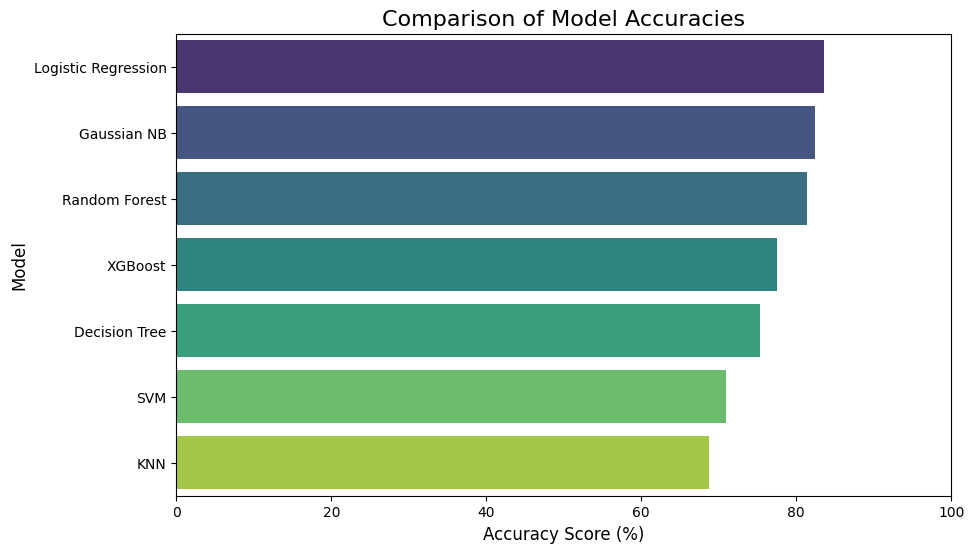

In [50]:
# Creating a list of model names and their corresponding accuracy scores
model_names = [
    'Logistic Regression',
    'Gaussian NB',
    'Random Forest',
    'XGBoost',
    'Decision Tree',
    'SVM',
    'KNN'
]

accuracy_scores = [
    score_lr,
    score_nb,
    score_rf,
    score_xgb,
    score_dt,
    score_sv,
    score_knn
]

# Creating  the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Accuracy Score (%)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 100) # x-axis limit to be from 0 to 100
plt.show()

In [51]:
# Creating a dictionary to hold the model names and their scores
results = {
    'Model': [
        'Logistic Regression',
        'Gaussian NB',
        'Random Forest',
        'XGBoost',
        'Decision Tree',
        'Support Vector Machine (SVM)',
        'K-Nearest Neighbors (KNN)'
    ],
    'Accuracy Score (%)': [
        score_lr,
        score_nb,
        score_rf,
        score_xgb,
        score_dt,
        score_sv,
        score_knn
    ]
}

# Converting the dictionary to  pandas DataFrame
results_df = pd.DataFrame(results)

# Sorting the results DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='Accuracy Score (%)', ascending=False).reset_index(drop=True)
results_df_sorted

,Model,Accuracy Score (%)
0,Logistic Regression,83.52
1,Gaussian NB,82.42
2,Random Forest,81.32
3,XGBoost,77.47
4,Decision Tree,75.27
5,Support Vector Machine (SVM),70.88
6,K-Nearest Neighbors (KNN),68.68



# Best Performing Model: Logistic Regression is  best model with an accuracy of 83.52%.
# Worst Performing Model: K-Nearest Neighbors (KNN) has the lowest accuracy at 68.68%.